<a href="https://colab.research.google.com/github/anandmpandit/LSTM_Example/blob/main/LSTM_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description : This program uses Artificial neural network called LSTM (Long Short Term Memory) to predict closing stock price of a company
#              AAPL using last 60 days stock price

In [9]:
#Import Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
plt.style.use('fivethirtyeight')
plt.show()


In [ ]:
#Get the yahoo finance libraries
!pip install yfinance
import yfinance as yf


In [11]:
import yfinance as yf

In [12]:
df = yf.download('AAPL',start='2007-01-01', end='2023-03-15')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,3.081786,3.092143,2.925000,2.992857,2.547276,1238319600
2007-01-04,3.001786,3.069643,2.993571,3.059286,2.603815,847260400
2007-01-05,3.063214,3.078571,3.014286,3.037500,2.585272,834741600
2007-01-08,3.070000,3.090357,3.045714,3.052500,2.598039,797106800
2007-01-09,3.087500,3.320714,3.041071,3.306071,2.813858,3349298400
...,...,...,...,...,...,...
2023-03-08,152.809998,153.470001,151.830002,152.869995,152.869995,47204800
2023-03-09,153.559998,154.539993,150.229996,150.589996,150.589996,53833600
2023-03-10,150.210007,150.940002,147.610001,148.500000,148.500000,68524400


In [13]:
df.shape


(4077, 6)

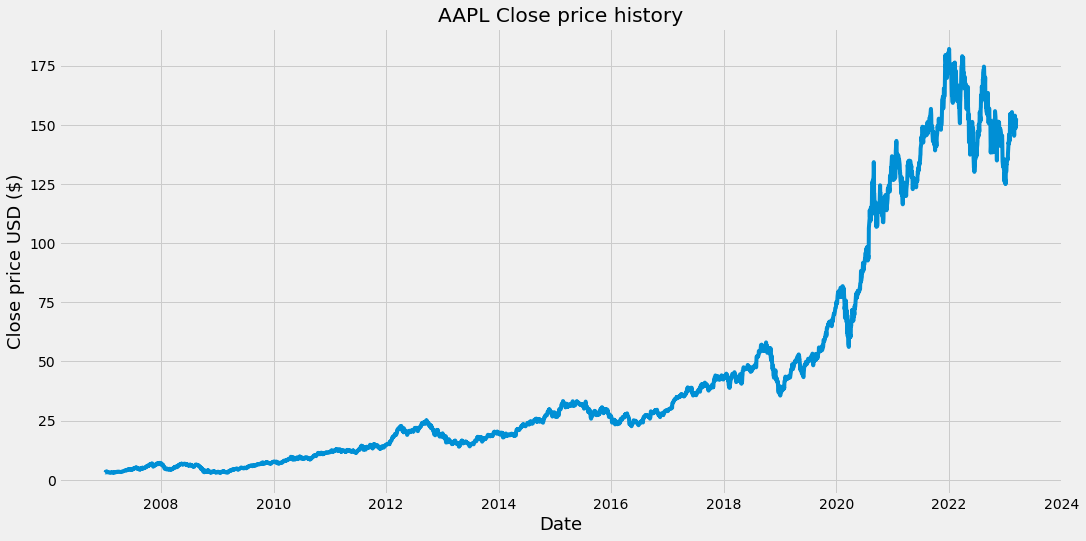

In [16]:
#Visualize closing price history

plt.figure(figsize=(16,8))
plt.title('AAPL Close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.show()

In [20]:
#Create new data frame with only the close price column
data = df.filter(['Close'])
print(data)

#Convert the dataframe to a numpy array
dataset = data.values

print(dataset)

#Get no of rows to train the model 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

                 Close
Date                  
2007-01-03    2.992857
2007-01-04    3.059286
2007-01-05    3.037500
2007-01-08    3.052500
2007-01-09    3.306071
...                ...
2023-03-08  152.869995
2023-03-09  150.589996
2023-03-10  148.500000
2023-03-13  150.470001
2023-03-14  152.589996

[4077 rows x 1 columns]
[[  2.99285698]
 [  3.05928612]
 [  3.0374999 ]
 ...
 [148.5       ]
 [150.47000122]
 [152.58999634]]


3262

In [23]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data 


array([[0.00111596],
       [0.00148663],
       [0.00136506],
       ...,
       [0.81302014],
       [0.8240124 ],
       [0.8358416 ]])

In [32]:
#Create training dataset
#Create scaled training dataset
train_data = scaled_data[0:training_data_len,:]

print(train_data)
#Split the dataset x_train and y_train datasets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()



[[0.00111596]
 [0.00148663]
 [0.00136506]
 ...
 [0.36309106]
 [0.36823845]
 [0.37480868]]
[array([0.00111596, 0.00148663, 0.00136506, 0.00144876, 0.00286364,
       0.00374646, 0.00350732, 0.00327217, 0.00376638, 0.00333793,
       0.00216617, 0.00205258, 0.00171181, 0.0014946 , 0.00169388,
       0.0016042 , 0.00143083, 0.00154243, 0.0014647 , 0.00150058,
       0.00130329, 0.00130528, 0.00114386, 0.00118571, 0.00158427,
       0.00159025, 0.00101035, 0.00133119, 0.00129532, 0.00141489,
       0.00139695, 0.00132122, 0.00153445, 0.00219207, 0.00225385,
       0.00216617, 0.00205457, 0.00114187, 0.00127738, 0.00176562,
       0.00143681, 0.00161815, 0.0019908 , 0.00189714, 0.00195294,
       0.00194696, 0.00232559, 0.00203265, 0.0023515 , 0.00226581,
       0.00226979, 0.00257668, 0.00264643, 0.00312271, 0.00314064,
       0.00305296, 0.00351728, 0.00343957, 0.00299716, 0.00309879])]
[0.002931399391199704]

[array([0.00111596, 0.00148663, 0.00136506, 0.00144876, 0.00286364,
       0.00

In [38]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

print (x_train)
print (y_train)

x_train.shape

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape



[[0.00111596 0.00148663 0.00136506 ... 0.00343957 0.00299716 0.00309879]
 [0.00148663 0.00136506 0.00144876 ... 0.00299716 0.00309879 0.0029314 ]
 [0.00136506 0.00144876 0.00286364 ... 0.00309879 0.0029314  0.00307887]
 ...
 [0.29517068 0.29264581 0.28814009 ... 0.35675799 0.35893412 0.36212854]
 [0.29264581 0.28814009 0.2895211  ... 0.35893412 0.36212854 0.36309106]
 [0.28814009 0.2895211  0.28807034 ... 0.36212854 0.36309106 0.36823845]]
[0.0029314  0.00307887 0.00324826 ... 0.36309106 0.36823845 0.37480868]


(3202, 60, 1)

In [40]:
#Build the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [41]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [42]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=1,verbose="auto")

3202/3202 [==============================] - 110s 33ms/step - loss: 1.5059e-04


In [ ]:
#Create a test data set
#Create a new array containing scaled values from index 3262 to 4077
print(training_data_len)
test_data = scaled_data[training_data_len - 60:,:]

print(test_data)

#Create data sets x_test and y_test
x_test =[]
y_test =dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])



#Convert data to a numpy array
x_test = np.array(x_test)

print(x_test)

#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))






In [52]:
#Get the models predicted price values
predictions = model.predict(x_test)
print(predictions)
predictions = scaler.inverse_transform(predictions)


26/26 [==============================] - 0s 17ms/step
[[0.38868317]
 [0.39222747]
 [0.3950015 ]
 [0.39701816]
 [0.39817634]
 [0.3999149 ]
 [0.40165317]
 [0.40455756]
 [0.4074373 ]
 [0.41026837]
 [0.41313627]
 [0.41726354]
 [0.42045677]
 [0.4233171 ]
 [0.4251401 ]
 [0.42743146]
 [0.4311891 ]
 [0.43511772]
 [0.44019657]
 [0.44376215]
 [0.44570205]
 [0.44758204]
 [0.44998455]
 [0.45161414]
 [0.4529233 ]
 [0.45424962]
 [0.45510045]
 [0.4531293 ]
 [0.45257428]
 [0.45443803]
 [0.45693594]
 [0.45553896]
 [0.45249516]
 [0.4518877 ]
 [0.45310476]
 [0.4559478 ]
 [0.4576782 ]
 [0.45906028]
 [0.45951796]
 [0.4614877 ]
 [0.46313113]
 [0.464388  ]
 [0.46367356]
 [0.46343702]
 [0.4625301 ]
 [0.45958436]
 [0.45234698]
 [0.44184235]
 [0.4328952 ]
 [0.42115703]
 [0.4102789 ]
 [0.4082807 ]
 [0.40811026]
 [0.41246662]
 [0.4155647 ]
 [0.41665426]
 [0.41070336]
 [0.4076488 ]
 [0.40368348]
 [0.3929952 ]
 [0.38888884]
 [0.37904462]
 [0.37124026]
 [0.3640207 ]
 [0.35786772]
 [0.3493035 ]
 [0.33994544]
 [0.3375

In [53]:
print(predictions)


[[ 72.45154 ]
 [ 73.08674 ]
 [ 73.58389 ]
 [ 73.94531 ]
 [ 74.15288 ]
 [ 74.464455]
 [ 74.775986]
 [ 75.2965  ]
 [ 75.8126  ]
 [ 76.31998 ]
 [ 76.833954]
 [ 77.57363 ]
 [ 78.14591 ]
 [ 78.65853 ]
 [ 78.985245]
 [ 79.3959  ]
 [ 80.06933 ]
 [ 80.77341 ]
 [ 81.683624]
 [ 82.32264 ]
 [ 82.670296]
 [ 83.007225]
 [ 83.4378  ]
 [ 83.72985 ]
 [ 83.96447 ]
 [ 84.20217 ]
 [ 84.35465 ]
 [ 84.00139 ]
 [ 83.901924]
 [ 84.23594 ]
 [ 84.68361 ]
 [ 84.43324 ]
 [ 83.88774 ]
 [ 83.77888 ]
 [ 83.996994]
 [ 84.50651 ]
 [ 84.81663 ]
 [ 85.06432 ]
 [ 85.14635 ]
 [ 85.49936 ]
 [ 85.79389 ]
 [ 86.01914 ]
 [ 85.891106]
 [ 85.84871 ]
 [ 85.68617 ]
 [ 85.15825 ]
 [ 83.86118 ]
 [ 81.97858 ]
 [ 80.37509 ]
 [ 78.271416]
 [ 76.32186 ]
 [ 75.96375 ]
 [ 75.933205]
 [ 76.71394 ]
 [ 77.269165]
 [ 77.46444 ]
 [ 76.397934]
 [ 75.8505  ]
 [ 75.139854]
 [ 73.22433 ]
 [ 72.488396]
 [ 70.724144]
 [ 69.32547 ]
 [ 68.0316  ]
 [ 66.92888 ]
 [ 65.39403 ]
 [ 63.716904]
 [ 63.28896 ]
 [ 63.429214]
 [ 64.41092 ]
 [ 65.12004 ]
 [ 65.

In [54]:
#Get the root mean sqaured error (RMSE) for the model
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

8.444446290059718

<ipython-input-59-06a9d5498685>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

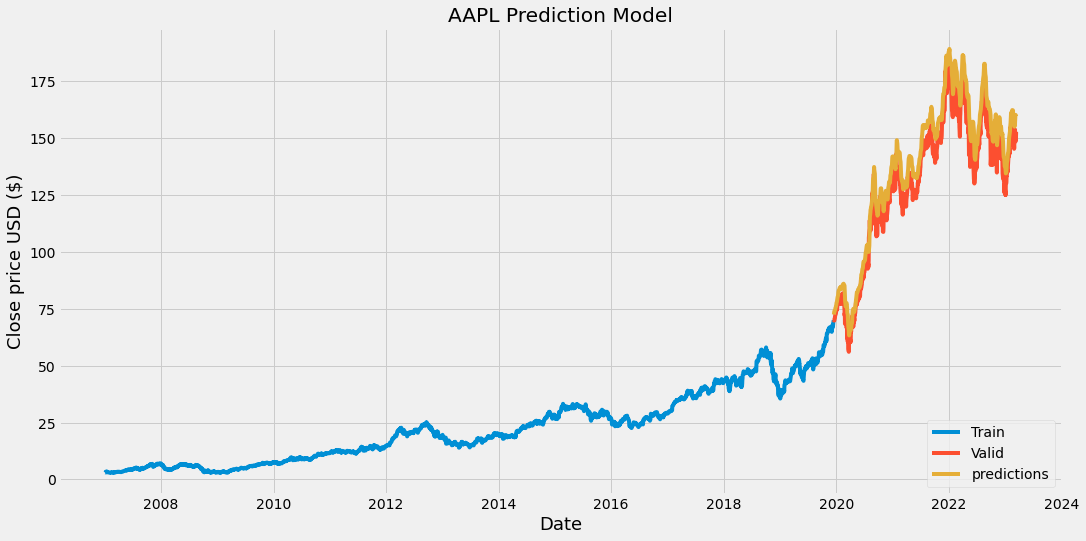

In [59]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions


#Visualize the data
plt.figure(figsize=(16,8))
plt.title('AAPL Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train','Valid','predictions'], loc='lower right')
plt.show
